In [26]:
import numpy  as np
import pandas as pd


In [27]:
data = pd.read_csv('dubai_real_estate.csv')
data.head()

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,...,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,...,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,...,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,...,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


In [28]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

In [29]:
columns_to_drop = ['price_category', 'average_rent', 'country', 'completion_status', 'furnishing', 'year_of_completion', 'total_building_area_sqft', 'city', 'area_name' ,
                   'purpose', 'Latitude', 'Longitude']

data.drop(columns=columns_to_drop, inplace=True)

data

,price,type,beds,baths,address,post_date,building_name,total_parking_spaces,total_floors,elevators
0,1450000,Apartment,1,2,"The Bay, Business Bay, Dubai",2024-04-15,Unknown,0,0,0
1,6600000,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",2024-04-15,Unknown,0,0,0
2,4825000,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",2024-04-18,VIDA RESIDENCE DOWNTOWN,510,56,11
3,980000,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",2024-01-03,Unknown,0,0,0
4,2499999,Townhouse,3,4,"Nima, The Valley, Dubai",2024-02-28,Unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41376,7100000,Apartment,2,2,"Serenia Living Tower 1, Serenia Living, Palm J...",2024-02-13,Serenia Living - Tower 1,625,19,6
41377,928200,Apartment,0,1,"Upper House East, Upper House, Jumeirah Lake T...",2024-02-13,UPPER HOUSE EAST,401,40,7
41378,3188900,Apartment,2,2,"Jadeel Building 3, Jadeel, Madinat Jumeirah Li...",2024-02-09,Unknown,0,0,0
41379,670000,Apartment,0,1,"Luxor by Imtiaz, JVC District 14, Jumeirah Vil...",2024-03-05,Unknown,0,0,0


In [30]:
data['post_date'] = pd.to_datetime(data['post_date'])
data['year'] = data['post_date'].dt.year
data['month'] = data['post_date'].dt.month
data['day'] = data['post_date'].dt.day

data

,price,type,beds,baths,address,post_date,building_name,total_parking_spaces,total_floors,elevators,year,month,day
0,1450000,Apartment,1,2,"The Bay, Business Bay, Dubai",2024-04-15,Unknown,0,0,0,2024,4,15
1,6600000,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",2024-04-15,Unknown,0,0,0,2024,4,15
2,4825000,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",2024-04-18,VIDA RESIDENCE DOWNTOWN,510,56,11,2024,4,18
3,980000,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",2024-01-03,Unknown,0,0,0,2024,1,3
4,2499999,Townhouse,3,4,"Nima, The Valley, Dubai",2024-02-28,Unknown,0,0,0,2024,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41376,7100000,Apartment,2,2,"Serenia Living Tower 1, Serenia Living, Palm J...",2024-02-13,Serenia Living - Tower 1,625,19,6,2024,2,13
41377,928200,Apartment,0,1,"Upper House East, Upper House, Jumeirah Lake T...",2024-02-13,UPPER HOUSE EAST,401,40,7,2024,2,13
41378,3188900,Apartment,2,2,"Jadeel Building 3, Jadeel, Madinat Jumeirah Li...",2024-02-09,Unknown,0,0,0,2024,2,9
41379,670000,Apartment,0,1,"Luxor by Imtiaz, JVC District 14, Jumeirah Vil...",2024-03-05,Unknown,0,0,0,2024,3,5


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])
data['address'] = le.fit_transform(data['address'])

data

,price,type,beds,baths,address,post_date,building_name,total_parking_spaces,total_floors,elevators,year,month,day
0,1450000,0,1,2,3392,2024-04-15,Unknown,0,0,0,2024,4,15
1,6600000,6,5,5,913,2024-04-15,Unknown,0,0,0,2024,4,15
2,4825000,0,2,3,3731,2024-04-18,VIDA RESIDENCE DOWNTOWN,510,56,11,2024,4,18
3,980000,0,3,3,978,2024-01-03,Unknown,0,0,0,2024,1,3
4,2499999,6,3,4,2536,2024-02-28,Unknown,0,0,0,2024,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41376,7100000,0,2,2,3114,2024-02-13,Serenia Living - Tower 1,625,19,6,2024,2,13
41377,928200,0,0,1,3692,2024-02-13,UPPER HOUSE EAST,401,40,7,2024,2,13
41378,3188900,0,2,2,1857,2024-02-09,Unknown,0,0,0,2024,2,9
41379,670000,0,0,1,2124,2024-03-05,Unknown,0,0,0,2024,3,5


In [32]:
columns_to_drop = ['post_date', 'building_name', 'month', 'day']

data.drop(columns=columns_to_drop, inplace=True)
data

,price,type,beds,baths,address,total_parking_spaces,total_floors,elevators,year
0,1450000,0,1,2,3392,0,0,0,2024
1,6600000,6,5,5,913,0,0,0,2024
2,4825000,0,2,3,3731,510,56,11,2024
3,980000,0,3,3,978,0,0,0,2024
4,2499999,6,3,4,2536,0,0,0,2024
...,...,...,...,...,...,...,...,...,...
41376,7100000,0,2,2,3114,625,19,6,2024
41377,928200,0,0,1,3692,401,40,7,2024
41378,3188900,0,2,2,1857,0,0,0,2024
41379,670000,0,0,1,2124,0,0,0,2024


In [33]:
X = data[['type', 'beds', 'baths','address', 'total_parking_spaces', 'total_floors', 'elevators', 'year']]
y = data['price']

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train)

[[   6    4    4 ...    0    0 2024]
 [   0    0    1 ...    6    0 2024]
 [   0    2    3 ...    0    0 2024]
 ...
 [   0    3    4 ...    8    0 2023]
 [   0    1    1 ...    0    0 2024]
 [   0    2    3 ...   53    0 2024]]


In [35]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mse', metrics=['mae'])


/home/beown/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)


In [40]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error: {mae}") 


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 35131404320768.0000 - mae: 2128156.2500
Test Loss: 44932786028544.0
Mean Absolute Error: 2160351.25


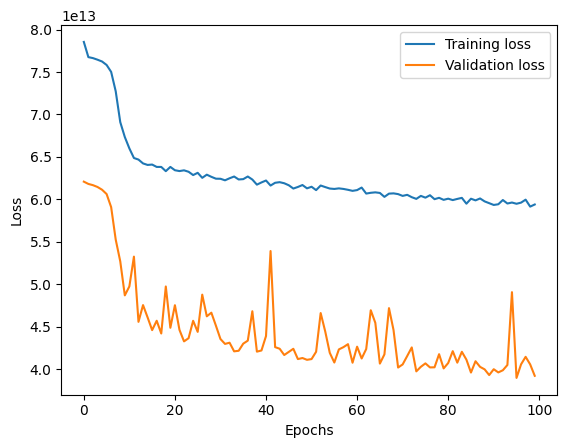

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [39]:
#example
prediction = { 
  'type': 1, 
  'beds': 2, 
  'baths': 2,
  'total_parking_spaces' : 5, 
  'total_floors': 9,
  'elevators' : 5,
  'address' : 0,
  'year' : 2024
   
}

new_data = pd.DataFrame([prediction]) 
predicted_price = model.predict(new_data)[0]

print("Predicted price for the new data:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted price for the new data: [2410738.8]
